In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import extragradient, projection_Moreau
import time

In [2]:
%%capture
np.random.seed(2)
L = 2
""" Return coordinate matrices from coordinate vectors. """
Afig = np.random.rand(10, 10)
X, Y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
F_x = Afig.dot(Y)
F_y = -np.transpose(Afig).dot(X)

In [3]:
%%capture
fig1 = plt.figure(1, figsize=(8,8))
ax1 = fig1.gca()
ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.003)

In [4]:
def payoff_matrix(X, Y, L):
    A = np.zeros(shape=(L,L))
    for i in range(L):
        for j in range(L):
            #if int(X[i])!=0 or int(X[i])!=1 or int(Y[j])!=0 or int(Y[j])!=1:
            #    print("The values are not binary:", int(X[i]), int(Y[j]))
            A[i,j] = (X[i] + Y[j]) / 2
    return A

In [5]:
# Time horizon of lenght N and process memory N.
d = 1
periods = 6
N = d + d*periods
# Initialiazing the time horizons.
time_horizon_x = np.zeros(shape=(N,L))
time_horizon_y = np.zeros(shape=(N,L))
# Create a random process grid at the initial time strech.
for s in range(d):
    x_0, y_0 = np.random.uniform(0,1,L), np.random.uniform(0,1,L)
    x_0, y_0 = x_0/np.sum(x_0), y_0/np.sum(y_0)
    # transform to 0 and 1
    for l in range(L):
        time_horizon_x[s] = x_0
        time_horizon_y[s] = y_0

In [6]:
payoff_matrix(time_horizon_x[0], time_horizon_y[0], L)

array([[0.69512352, 0.65799081],
       [0.34200919, 0.30487648]])

In [8]:
time_horizon_x

array([[0.85311432, 0.14688568],
       [0.73213546, 0.26786454],
       [0.        , 0.        ],
       [0.94374379, 0.05625621],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.77871997, 0.22128003]])

Solution for x: [0.73213546 0.26786454] , solution for y: [0.39368002 0.60631998] , iterations: 200
Solution for x: [0 0] , solution for y: [0 0] , iterations: 1033


/home/im2ag/Desktop/M1/Internship/ljk-dao-internship/utils.py:20: RuntimeWarning: overflow encountered in double_scalars
  rate *= beta
/home/im2ag/Desktop/M1/Internship/ljk-dao-internship/projections.py:45: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([max(0, y_i-t) for y_i in y])
/home/im2ag/Desktop/M1/Internship/ljk-dao-internship/utils.py:74: RuntimeWarning: invalid value encountered in multiply
  x = projection(x - rate*(x_grad_),d)
/home/im2ag/Desktop/M1/Internship/ljk-dao-internship/utils.py:75: RuntimeWarning: invalid value encountered in multiply
  y = projection(y - rate*(y_grad_),d)


Solution for x: [0.94374379 0.05625621] , solution for y: [0.16888948 0.83111052] , iterations: 200
Solution for x: [0 0] , solution for y: [0 0] , iterations: 1030
Solution for x: [0 0] , solution for y: [0 0] , iterations: 1030
Solution for x: [0.77871997 0.22128003] , solution for y: [1. 0.] , iterations: 1309


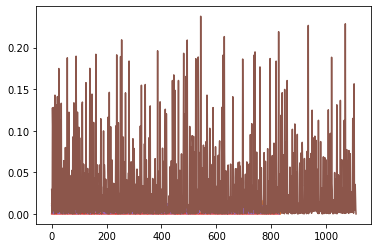

In [7]:
# Generate time series.
for s in range(d,N):
    # L*L pay-off matrix.
    A = np.random.rand(L,L)#payoff_matrix(time_horizon_x[s-1], time_horizon_y[s-1], L)
    x_rand, y_rand = np.random.randn(L), np.random.randn(L)
    x_init, y_init = x_rand/np.sum(x_rand), y_rand/np.sum(y_rand)
    # Extragradient Descent with adaptive step size and Yunmei Chen and Xiaojing Ye projection.
    x, y, iter = extragradient(A, L, x_init, y_init, 0.02, ax1, adaptive = True, projection = projection_Moreau)
    print("Solution for x:", x, ", solution for y:", y, ", iterations:", iter)
    time_horizon_x[s] = x
    time_horizon_y[s] = y

In [ ]:
# Gradient Descent.
start_time = time.time()
theta, i, log_err = estimate_parameters(time_horizon, N, L, d, max_iterations=1000, activation=activation, loss=loss)
print("Iterations:", i, ", time:", (time.time() - start_time), ".")
plt.plot(log_err, label="Log loss function")

In [ ]:
X_test = time_horizon[(N-d):N].flatten()
y = np.ones(L)
for l in range(L):
    y[l] = activation_binary(np.dot(X_test, true_theta[l]))
prediction = np.ones(L)
for l in range(L):
    prediction[l] = activation(np.dot(X_test, theta[l]))

In [ ]:
# Basic configuration.
fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
ax1, ax2 = axes
im1 = ax1.matshow(y.reshape((L_rows, L_columns)))
im2 = ax2.matshow(prediction.reshape((L_rows, L_columns)))

# Formatting for heat map 1.
ax1.set_xticks(range(L_columns))
ax1.set_yticks(range(L_rows))
ax1.set_title("Ground truth")
plt.setp(ax1.get_xticklabels(), ha='left')
plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

# Formatting for heat map 2.
ax2.set_xticks(range(L_columns))
ax2.set_yticks(range(L_rows))
ax2.set_title("Prediction")
plt.setp(ax2.get_xticklabels(), ha='left')
plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

fig.tight_layout()